# Feature Scaling
Many Times models have a poor performance due to the features used to make predictions, this brings about disparities in model accuracy.

in this notebook, we shall look at how to identify the best features to be used in our models to attain optimum performance.

* The data set used is highly categorical, thus we shall look at dummy encoding, using Select K Best model for identifying required features, and use of the recurrent feature elimination(RFE) to select features that give the model better performance.
* lastly we shall use ensemble algorithms like Random forest, extra tree classifiers, and lightgbm to select best features.

In [1]:
# lets import our libraries for staters
import numpy as np 
import pandas as pd
from pandas import read_csv
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("global_air_pollution_data.csv")
data.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
# identify missing data 
data.isna().sum()


country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [4]:
# Remove missing Data
data.dropna(axis=0, inplace=True)
data.isna().sum()

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

In [5]:
# identify Data types to know how to select those we need to convert
data.dtypes

country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object

In [6]:
# know the shape of the data so that we can be able to know after encoding how much columns have we gained
data.shape

(23035, 12)

In [7]:
# to reduce Bias , we remove features that don't make valuable insight into accuracy
data.drop(['country_name', 'city_name'], axis=1, inplace=True)

In [8]:
# select all categorical columns to encode the columns
cat = [col for col in data.columns if data[col].dtype is not ['int64']]
cat

['aqi_value',
 'aqi_category',
 'co_aqi_value\t',
 'co_aqi_category',
 'ozone_aqi_value',
 'ozone_aqi_category',
 'no2_aqi_value',
 'no2_aqi_category',
 'pm2.5_aqi_value',
 'pm2.5_aqi_category']

In [9]:
# Use get_dummy for converting categorical columns
df = pd.get_dummies(data[cat] , drop_first=True)
df

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,aqi_category_Hazardous,aqi_category_Moderate,aqi_category_Unhealthy,aqi_category_Unhealthy for Sensitive Groups,aqi_category_Very Unhealthy,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,51,1,36,0,51,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,41,1,5,1,41,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,66,1,39,2,66,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,34,1,34,0,20,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22,0,22,0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,184,3,154,2,184,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
23459,50,1,20,5,50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23460,50,1,22,1,50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23461,71,1,44,2,71,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
# how much has increased from the original shape
df.shape

(23035, 22)

In [11]:
columns = df.columns
columns

Index(['aqi_value', 'co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value',
       'pm2.5_aqi_value', 'aqi_category_Hazardous', 'aqi_category_Moderate',
       'aqi_category_Unhealthy', 'aqi_category_Unhealthy for Sensitive Groups',
       'aqi_category_Very Unhealthy', 'co_aqi_category_Moderate',
       'co_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Moderate', 'ozone_aqi_category_Unhealthy',
       'ozone_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Very Unhealthy', 'no2_aqi_category_Moderate',
       'pm2.5_aqi_category_Hazardous', 'pm2.5_aqi_category_Moderate',
       'pm2.5_aqi_category_Unhealthy',
       'pm2.5_aqi_category_Unhealthy for Sensitive Groups',
       'pm2.5_aqi_category_Very Unhealthy'],
      dtype='object')

In [12]:
X = df.drop('aqi_value', axis=1)
X.head()

,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,aqi_category_Hazardous,aqi_category_Moderate,aqi_category_Unhealthy,aqi_category_Unhealthy for Sensitive Groups,aqi_category_Very Unhealthy,co_aqi_category_Moderate,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,1,36,0,51,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,5,1,41,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,39,2,66,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,34,0,20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,22,0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
type(X)
X = pd.DataFrame(X)
X

,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,aqi_category_Hazardous,aqi_category_Moderate,aqi_category_Unhealthy,aqi_category_Unhealthy for Sensitive Groups,aqi_category_Very Unhealthy,co_aqi_category_Moderate,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,1,36,0,51,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,5,1,41,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,39,2,66,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,34,0,20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,22,0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,3,154,2,184,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
23459,1,20,5,50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23460,1,22,1,50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23461,1,44,2,71,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [13]:
cols = X.columns
cols


Index(['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value',
       'aqi_category_Hazardous', 'aqi_category_Moderate',
       'aqi_category_Unhealthy', 'aqi_category_Unhealthy for Sensitive Groups',
       'aqi_category_Very Unhealthy', 'co_aqi_category_Moderate',
       'co_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Moderate', 'ozone_aqi_category_Unhealthy',
       'ozone_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Very Unhealthy', 'no2_aqi_category_Moderate',
       'pm2.5_aqi_category_Hazardous', 'pm2.5_aqi_category_Moderate',
       'pm2.5_aqi_category_Unhealthy',
       'pm2.5_aqi_category_Unhealthy for Sensitive Groups',
       'pm2.5_aqi_category_Very Unhealthy'],
      dtype='object')

In [14]:
y = df['aqi_value']
y.head()

0    51
1    41
2    66
3    34
4    22
Name: aqi_value, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X

array([[0.0075188 , 0.15319149, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.0212766 , 0.01098901, ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.16595745, 0.02197802, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0075188 , 0.09361702, 0.01098901, ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.18723404, 0.02197802, ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.16170213, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
X = pd.DataFrame(data=X, columns=cols)
X

,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,aqi_category_Hazardous,aqi_category_Moderate,aqi_category_Unhealthy,aqi_category_Unhealthy for Sensitive Groups,aqi_category_Very Unhealthy,co_aqi_category_Moderate,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,0.007519,0.153191,0.000000,0.102,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.007519,0.021277,0.010989,0.082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007519,0.165957,0.021978,0.132,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.007519,0.144681,0.000000,0.040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.093617,0.000000,0.012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,0.022556,0.655319,0.021978,0.368,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23031,0.007519,0.085106,0.054945,0.100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23032,0.007519,0.093617,0.010989,0.100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23033,0.007519,0.187234,0.021978,0.142,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# Use select Kbest function and CHI^2 for statistical measurement and significancy.
from sklearn.feature_selection import SelectKBest,chi2,RFE
sk = SelectKBest(score_func=chi2, k=10).fit(X,y)
bestcols = sk.scores_
pv = sk.pvalues_

bst_features = pd.DataFrame({"Features": cols, "Score": bestcols, "Pvalue": pv})
print(bst_features.sort_values(by='Score', ascending=False).head(10))


                                             Features         Score  Pvalue
4                              aqi_category_Hazardous  22844.000000     0.0
8                         aqi_category_Very Unhealthy  22749.000000     0.0
16                       pm2.5_aqi_category_Hazardous  22327.302326     0.0
7         aqi_category_Unhealthy for Sensitive Groups  21467.000000     0.0
6                              aqi_category_Unhealthy  20820.000000     0.0
20                  pm2.5_aqi_category_Very Unhealthy  20218.003932     0.0
18                       pm2.5_aqi_category_Unhealthy  19272.731320     0.0
19  pm2.5_aqi_category_Unhealthy for Sensitive Groups  18739.586333     0.0
5                               aqi_category_Moderate  13948.000000     0.0
17                        pm2.5_aqi_category_Moderate  13175.875708     0.0


In [19]:
# we need to sort the resutls from the one with highest score and lowest Pvlaue
top_20_features = bst_features.sort_values(by='Score', ascending=False)
print(top_20_features.head(20))

                                             Features         Score  \
4                              aqi_category_Hazardous  22844.000000   
8                         aqi_category_Very Unhealthy  22749.000000   
16                       pm2.5_aqi_category_Hazardous  22327.302326   
7         aqi_category_Unhealthy for Sensitive Groups  21467.000000   
6                              aqi_category_Unhealthy  20820.000000   
20                  pm2.5_aqi_category_Very Unhealthy  20218.003932   
18                       pm2.5_aqi_category_Unhealthy  19272.731320   
19  pm2.5_aqi_category_Unhealthy for Sensitive Groups  18739.586333   
5                               aqi_category_Moderate  13948.000000   
17                        pm2.5_aqi_category_Moderate  13175.875708   
9                            co_aqi_category_Moderate  12955.187500   
14                  ozone_aqi_category_Very Unhealthy  11792.605821   
15                          no2_aqi_category_Moderate   6542.519362   
12    

In [20]:
# use a RFE and any model but usually from model selection, the best performing model
from lightgbm import LGBMRegressor
RG = LGBMRegressor()
rfe = RFE(estimator=RG, n_features_to_select=20).fit(X,y)
top_20 = cols[rfe.support_]
top_20 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 23035, number of used features: 18
[LightGBM] [Info] Start training from score 72.344693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 23035, number of used features: 18
[LightGBM] [Info] Start training from score 72.344693


Index(['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value',
       'aqi_category_Hazardous', 'aqi_category_Moderate',
       'aqi_category_Unhealthy', 'aqi_category_Unhealthy for Sensitive Groups',
       'aqi_category_Very Unhealthy', 'co_aqi_category_Moderate',
       'ozone_aqi_category_Moderate', 'ozone_aqi_category_Unhealthy',
       'ozone_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Very Unhealthy', 'no2_aqi_category_Moderate',
       'pm2.5_aqi_category_Hazardous', 'pm2.5_aqi_category_Moderate',
       'pm2.5_aqi_category_Unhealthy',
       'pm2.5_aqi_category_Unhealthy for Sensitive Groups',
       'pm2.5_aqi_category_Very Unhealthy'],
      dtype='object')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 23035, number of used features: 18
[LightGBM] [Info] Start training from score 72.344693


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


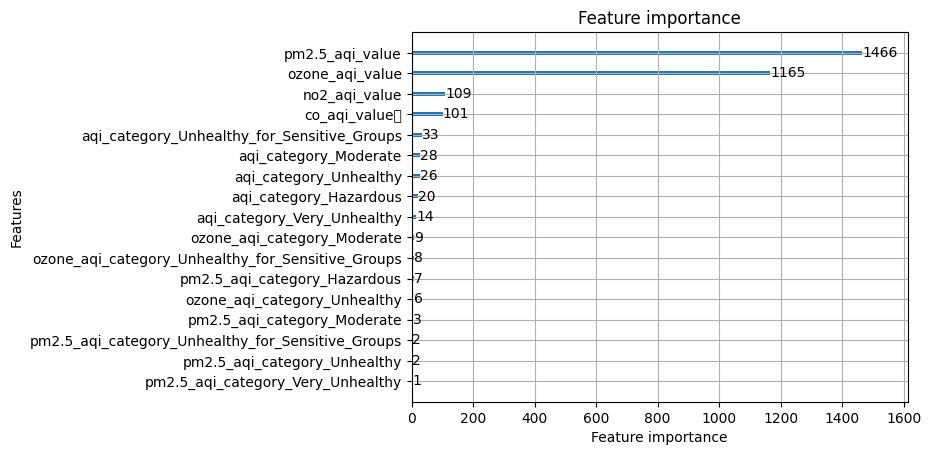

In [24]:
# use plot metric from tree models
import lightgbm as lgb
RG.fit(X,y)

lgb.plot_importance(RG)